<a href="https://colab.research.google.com/github/arghac14/CropYield-prediction/blob/master/CropPrediction(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import pickle

In [2]:
df_old = pd.read_csv("dataset.csv")
df_old.head()

,District,Year,Season,Yield,Month,Tempreture,Humidity,Rainfall
0,Colombo,2015,Maha,3431,January,27.4,68.0,32.7
1,Colombo,2015,Maha,3431,February,25.7,70.0,122.5
2,Colombo,2015,Maha,3431,March,28.1,71.0,220.9
3,Colombo,2015,Maha,3431,October,27.8,78.0,235.4
4,Colombo,2015,Maha,3431,November,27.6,78.0,525.8


In [49]:
df.count()

Humidity                 1800
Rainfall                 1800
Yield                    1800
District_Anuradhapura    1800
District_Badulla         1800
District_Batticaloa      1800
District_Colombo         1800
District_Galle           1800
District_Gampaha         1800
District_Hambantota      1800
District_Jaffna          1800
District_Kaluthara       1800
District_Kandy           1800
District_Kegalle         1800
District_Kilinochchi     1800
District_Kurunegala      1800
District_Mannar          1800
District_Matale          1800
District_Matara          1800
District_Monaragala      1800
District_Mullaitivu      1800
District_NuwaraEliya     1800
District_Polonnaruwa     1800
District_Puttalam        1800
District_Ratnapura       1800
District_Trincomalee     1800
District_Vavuniya        1800
Season_Yala              1800
Tempreture               1800
dtype: int64

#### Data pre-processing:

Dropping unnecessary columns

In [4]:
df_old.isnull().sum()

District         0
Year             0
Season           0
Yield            0
Month          300
Tempreture     600
Humidity      1080
Rainfall      1080
dtype: int64

In [6]:
#forward filling is used to fill out the missing values
df_old = df_old.fillna(method = "ffill")

In [8]:
df_old.isnull().sum()

District      0
Year          0
Season        0
Yield         0
Month         0
Tempreture    0
Humidity      0
Rainfall      0
dtype: int64

In [9]:
df = df_old.drop(["Year","Month"], axis = 1)
df.head()



,District,Season,Yield,Tempreture,Humidity,Rainfall
0,Colombo,Maha,3431,27.4,68.0,32.7
1,Colombo,Maha,3431,25.7,70.0,122.5
2,Colombo,Maha,3431,28.1,71.0,220.9
3,Colombo,Maha,3431,27.8,78.0,235.4
4,Colombo,Maha,3431,27.6,78.0,525.8


In [10]:
print(df["District"].unique())

['Colombo' 'Gampaha' 'Kaluthara' 'Galle' 'Matara' 'Ratnapura' 'Kegalle'
 'Kurunegala' 'Puttalam' 'Kandy' 'Matale' 'NuwaraEliya' 'Badulla'
 'Monaragala' 'Jaffna' 'Kilinochchi' 'Vavuniya' 'Mullaitivu' 'Mannar'
 'Anuradhapura' 'Polonnaruwa' 'Trincomalee' 'Batticaloa' 'Ampara'
 'Hambantota']


reorganizing columns

In [13]:
df = df.iloc[:,[0,1,3,4,5,2]]
df.head()

,District,Season,Humidity,Rainfall,Yield,Tempreture
0,Colombo,Maha,68.0,32.7,3431,27.4
1,Colombo,Maha,70.0,122.5,3431,25.7
2,Colombo,Maha,71.0,220.9,3431,28.1
3,Colombo,Maha,78.0,235.4,3431,27.8
4,Colombo,Maha,78.0,525.8,3431,27.6


In [14]:
df = pd.get_dummies(df,drop_first = True)
df.head()

,Humidity,Rainfall,Yield,Tempreture,District_Anuradhapura,District_Badulla,District_Batticaloa,District_Colombo,District_Galle,District_Gampaha,...,District_Matara,District_Monaragala,District_Mullaitivu,District_NuwaraEliya,District_Polonnaruwa,District_Puttalam,District_Ratnapura,District_Trincomalee,District_Vavuniya,Season_Yala
0,68.0,32.7,3431,27.4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,70.0,122.5,3431,25.7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,71.0,220.9,3431,28.1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,78.0,235.4,3431,27.8,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.0,525.8,3431,27.6,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


reorganizing columns

In [15]:
df = df.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,3]]
df.head()

,Humidity,Rainfall,Yield,District_Anuradhapura,District_Badulla,District_Batticaloa,District_Colombo,District_Galle,District_Gampaha,District_Hambantota,...,District_Monaragala,District_Mullaitivu,District_NuwaraEliya,District_Polonnaruwa,District_Puttalam,District_Ratnapura,District_Trincomalee,District_Vavuniya,Season_Yala,Tempreture
0,68.0,32.7,3431,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,27.4
1,70.0,122.5,3431,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,25.7
2,71.0,220.9,3431,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,28.1
3,78.0,235.4,3431,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,27.8
4,78.0,525.8,3431,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,27.6


<AxesSubplot:>

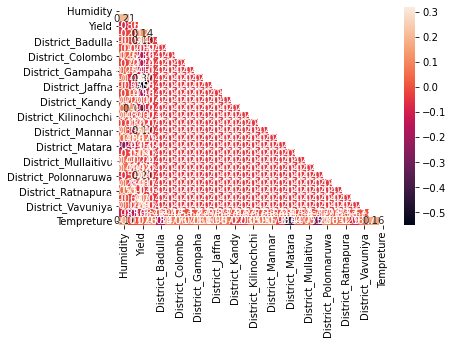

In [16]:
mask = np.triu(df.corr())
sns.heatmap(df.corr(),mask=mask,annot=True)

#### scaling data:

In [17]:
x = df.iloc[:,:28].values
y = df.iloc[:,28].values

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=0)


In [18]:
ss = StandardScaler()

x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)
y_train = np.array(y_train)

#### principal component analysis:

In [19]:
pc = PCA(n_components=28)


In [20]:
pc.fit(x_train_scaled)

PCA(n_components=28)

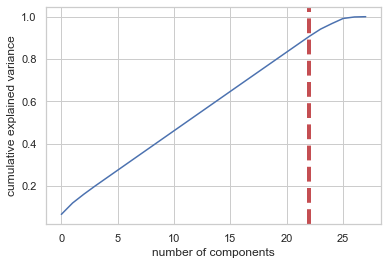

None

In [22]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pc.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=22, ymin=0, ymax=1)
display(plt.show())

In [25]:
pc_new = PCA(n_components=22)
pc_new.fit(x_train_scaled)

x_train_scaled_pca = pc_new.transform(x_train_scaled)
x_test_scaled_pca = pc_new.transform(x_test_scaled)

pca_df_new_train = pd.DataFrame(x_train_scaled_pca,columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19","PC20","PC21","PC22"])
pca_df_new_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
0,1.412460,-0.392988,-0.228405,-0.406027,0.006027,0.034436,-0.236285,-0.159214,0.048904,-0.254319,...,-0.147841,-0.227555,0.358372,4.420657,1.808428,0.307179,-0.358078,0.668596,-0.295642,-0.190861
1,5.104406,1.834187,-1.176723,-0.785854,0.148394,0.910066,-0.688184,-0.190636,0.119128,-0.679007,...,1.118402,1.322087,1.512135,-0.990502,-0.419874,-0.294223,-0.112538,0.032200,-0.237126,-0.712469
2,-0.599578,-0.518549,0.019404,-2.022029,0.006147,-0.089308,-0.251353,0.247358,0.003091,-0.060503,...,0.330510,-1.921200,1.155577,-0.537097,0.046371,3.739185,0.466024,-0.127727,-0.502885,-1.210310
3,-0.149624,-0.605479,0.019832,1.475860,-0.107482,-0.377173,-0.461394,-0.495557,0.160753,-1.230238,...,3.914927,0.488470,-1.507031,0.104670,-0.590836,0.491952,-0.250376,0.504108,-0.059507,0.192706
4,-1.693566,1.002452,0.715359,1.647585,-0.030536,-0.227489,0.078169,-0.133987,-0.137651,0.093276,...,0.213663,1.739267,2.395913,-1.240209,2.793103,0.346046,-1.452033,-0.028654,0.094451,0.501277


## RandomForest Regression:

RandomForestRegressor

In [35]:
#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200,num = 12)]

#number of features to consider at every split
max_features = ['auto','sqrt']

#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [36]:
#Create the random grid
random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [38]:
rf = RandomForestRegressor()



RandomForestRegressor()

Select best hyperparameters

In [44]:

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=0, n_jobs=1)


In [47]:
y_train

array([28.1, 29. , 25.4, ..., 27.9, 29.7, 25.6])

In [48]:
rf_random.fit(x_train_scaled_pca, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   3.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   3.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   3.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   3.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   4.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   3.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [50]:
predictions = rf.predict(x_test_scaled_pca)

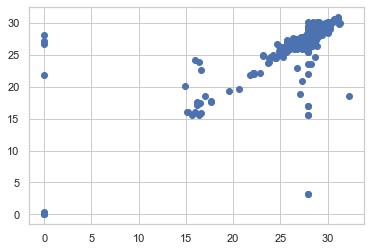

In [57]:
plt.scatter(y_test,predictions)

In [58]:
#saving model
file = open('random_forest_regression.pkl','wb')
pickle.dump(rf, file)